In [1]:
# import packages
import pandas as pd
import numpy as np

> start from the population density

In [15]:
# load the land area data
land_area = pd.read_excel('Land Area.xls')
land_area.head()

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0
3,"Baldwin, AL",1003,0,2027.08,0,0,0,2026.93,0,0,...,0,0,0,430.55,0,0,0,430.58,0,0
4,"Barbour, AL",1005,0,904.59,0,0,0,904.52,0,0,...,0,0,0,19.59,0,0,0,19.61,0,0


In [16]:
#only keep areaname, and LND010190D columns, and replace the column names with 'State' and 'Land Area'
land_area = land_area[['Areaname','STCOU', 'LND010190D']]
land_area.columns = ['Areaname', 'FIPS','area']
land_area.head()

,Areaname,FIPS,area
0,UNITED STATES,0,3787425.08
1,ALABAMA,1000,52422.94
2,"Autauga, AL",1001,604.49
3,"Baldwin, AL",1003,2027.08
4,"Barbour, AL",1005,904.59


In [17]:
# extract rows for areaname having','
county_area = land_area[land_area.Areaname.str.contains(',')]
# for the rest of the rows, save to state_area
state_area = land_area[~land_area.Areaname.str.contains(',')]
county_area.head()

,Areaname,FIPS,area
2,"Autauga, AL",1001,604.49
3,"Baldwin, AL",1003,2027.08
4,"Barbour, AL",1005,904.59
5,"Bibb, AL",1007,625.50
6,"Blount, AL",1009,650.65


In [18]:
state_area.head()

,Areaname,FIPS,area
0,UNITED STATES,0,3787425.08
1,ALABAMA,1000,52422.94
69,ALASKA,2000,656424.14
99,ARIZONA,4000,114006.26
115,ARKANSAS,5000,53182.36


In [19]:
import warnings
warnings.filterwarnings('ignore')
# for the areaname in county_area, split the string by ',', for two columns ,county and state
county_area[['county', 'state']] = county_area.Areaname.str.split(',', expand=True)
county_area.head()

,Areaname,FIPS,area,county,state
2,"Autauga, AL",1001,604.49,Autauga,AL
3,"Baldwin, AL",1003,2027.08,Baldwin,AL
4,"Barbour, AL",1005,904.59,Barbour,AL
5,"Bibb, AL",1007,625.50,Bibb,AL
6,"Blount, AL",1009,650.65,Blount,AL


In [21]:
len(county_area)

3145

In [35]:
# load the populaton data
population = pd.read_csv('covid_county_population_usafacts.csv')
population.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [28]:
# delete the countyFIPS==0
population = population[population.countyFIPS!=0]
len(population)

3144

In [30]:
# for all the FIPS in county_area, find the one ont in countyFIPS population
countyfips= population['countyFIPS'].values 
fips = county_area['FIPS'].values
# check the difference
list_missing=set(fips)-set(countyfips)


In [31]:
# print the row in county_area that has FIPS in list_missing
county_area[county_area.FIPS.isin(list_missing)]


,Areaname,FIPS,area,county,state
1682,"Yellowstone National Park, MT",30113,246.12,Yellowstone National Park,MT
2461,"Shannon, SD",46113,2096.72,Shannon,SD
2965,"Bedford, VA",51515,6.86,Bedford,VA
2970,"Clifton Forge, VA",51560,3.10,Clifton Forge,VA
2998,"South Boston, VA",51780,5.55,South Boston,VA


In [36]:
population[population.countyFIPS.isin(list_missing)]

,countyFIPS,County Name,State,population


In [37]:
# drop the row in county_area that has FIPS in list_missing
county_area = county_area[~county_area.FIPS.isin(list_missing)]

In [40]:
pop_density = pd.merge(county_area, population, left_on='FIPS', right_on='countyFIPS')
pop_density.head()

,Areaname,FIPS,area,county,state,countyFIPS,County Name,State,population
0,"Autauga, AL",1001,604.49,Autauga,AL,1001,Autauga County,AL,55869
1,"Baldwin, AL",1003,2027.08,Baldwin,AL,1003,Baldwin County,AL,223234
2,"Barbour, AL",1005,904.59,Barbour,AL,1005,Barbour County,AL,24686
3,"Bibb, AL",1007,625.50,Bibb,AL,1007,Bibb County,AL,22394
4,"Blount, AL",1009,650.65,Blount,AL,1009,Blount County,AL,57826


In [41]:
# people /square miles 
pop_density['pop_density'] = pop_density['population']/pop_density['area']
pop_density.head()

,Areaname,FIPS,area,county,state,countyFIPS,County Name,State,population,pop_density
0,"Autauga, AL",1001,604.49,Autauga,AL,1001,Autauga County,AL,55869,92.423365
1,"Baldwin, AL",1003,2027.08,Baldwin,AL,1003,Baldwin County,AL,223234,110.125895
2,"Barbour, AL",1005,904.59,Barbour,AL,1005,Barbour County,AL,24686,27.289711
3,"Bibb, AL",1007,625.50,Bibb,AL,1007,Bibb County,AL,22394,35.801759
4,"Blount, AL",1009,650.65,Blount,AL,1009,Blount County,AL,57826,88.874203


In [61]:
# only save the columns 'countyFIPS' 'pop_density'
pop_density_final = pop_density[['countyFIPS', 'pop_density','population','area']]
pop_density_final.head()

,countyFIPS,pop_density,population,area
0,1001,92.423365,55869,604.49
1,1003,110.125895,223234,2027.08
2,1005,27.289711,24686,904.59
3,1007,35.801759,22394,625.50
4,1009,88.874203,57826,650.65


> new cases and deaths

In [42]:
# cases
cases = pd.read_csv('covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19812,19812,19812,19812,19812,19812,19836,19836,19836,19836
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70040,70040,70040,70040,70040,70040,70159,70159,70159,70159
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7509,7509,7509,7509,7509,7509,7512,7512,7512,7512
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8105,8105,8105,8105,8105,8105,8113,8113,8113,8113


In [43]:
# deaths
deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-03-24,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,730,730,730,730,730,730,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [47]:
start_date = "2020-01-22"
end_date = "2020-06-30"
data_cloumns = pd.to_datetime(cases.columns[4:])
mask = (data_cloumns >= start_date) & (data_cloumns <= end_date)
# add the 4 true to mask 
mask = np.append([True, True, True, True], mask)
new_cases = cases.loc[:, mask]
new_cases.head()



,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,434,442,453,469,479,488,498,503,527,537
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,430,437,450,464,477,515,555,575,643,680
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,272,277,280,288,305,312,317,317,322,325
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,127,129,135,141,149,153,161,162,165,170


In [48]:
# delete the countyFIPS==0
new_cases = new_cases[new_cases.countyFIPS!=0]
new_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,434,442,453,469,479,488,498,503,527,537
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,430,437,450,464,477,515,555,575,643,680
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,272,277,280,288,305,312,317,317,322,325
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,127,129,135,141,149,153,161,162,165,170
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,149,153,159,168,176,184,188,189,199,208


In [69]:
# this seems to be addedup number of cases, we need to calculate the daily new cases
# for 4: , replace the values with delete the earlier one column values
# for the last column value = last column value - the second last column value
new_cases.iloc[:,4:] = new_cases.iloc[:,4:].diff(axis=1)
# fill column 4 with 0
new_cases.iloc[:,4] = new_cases.iloc[:,4].fillna(0)
new_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
1,1001,Autauga County,AL,1,0.0,0,0,0,0,0,...,3,8,11,16,10,9,10,5,24,10
2,1003,Baldwin County,AL,1,0.0,0,0,0,0,0,...,10,7,13,14,13,38,40,20,68,37
3,1005,Barbour County,AL,1,0.0,0,0,0,0,0,...,0,5,3,8,17,7,5,0,5,3
4,1007,Bibb County,AL,1,0.0,0,0,0,0,0,...,1,2,6,6,8,4,8,1,3,5
5,1009,Blount County,AL,1,0.0,0,0,0,0,0,...,6,4,6,9,8,8,4,1,10,9


In [49]:
new_deaths = deaths.loc[:, mask]
new_deaths= new_deaths[new_deaths.countyFIPS!=0]
new_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,9,9,9,11,11,11,12,12,12,12
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,10,10,10,10
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [70]:
new_deaths.iloc[:,4:] = new_deaths.iloc[:,4:].diff(axis=1)
new_deaths.iloc[:,4] = new_deaths.iloc[:,4].fillna(0)
new_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
1,1001,Autauga County,AL,1,0.0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
2,1003,Baldwin County,AL,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1005,Barbour County,AL,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1007,Bibb County,AL,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1009,Blount County,AL,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
len(new_cases)

3142

In [53]:
len(new_deaths)

3142

In [57]:
fips = county_area['FIPS'].values
casefips= new_cases['countyFIPS'].values
deathfips= new_deaths['countyFIPS'].values
list_diff= set(fips)-set(deathfips)
# frop this list from pop_density
pop_density = pop_density[~pop_density.FIPS.isin(list_diff)]

In [71]:
# merge the new_cases with pop_density
cases_final = pd.merge(pop_density_final, new_cases,left_on='countyFIPS',right_on='countyFIPS')
cases_final.head()

,countyFIPS,pop_density,population,area,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
0,1001,92.423365,55869,604.49,Autauga County,AL,1,0.0,0,0,...,3,8,11,16,10,9,10,5,24,10
1,1003,110.125895,223234,2027.08,Baldwin County,AL,1,0.0,0,0,...,10,7,13,14,13,38,40,20,68,37
2,1005,27.289711,24686,904.59,Barbour County,AL,1,0.0,0,0,...,0,5,3,8,17,7,5,0,5,3
3,1007,35.801759,22394,625.50,Bibb County,AL,1,0.0,0,0,...,1,2,6,6,8,4,8,1,3,5
4,1009,88.874203,57826,650.65,Blount County,AL,1,0.0,0,0,...,6,4,6,9,8,8,4,1,10,9


In [72]:
# merge the new_deaths with pop_density
deaths_final = pd.merge(pop_density_final, new_deaths,left_on='countyFIPS',right_on='countyFIPS')
deaths_final.head()

,countyFIPS,pop_density,population,area,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,...,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30
0,1001,92.423365,55869,604.49,Autauga County,AL,1,0.0,0,0,...,0,0,0,2,0,0,1,0,0,0
1,1003,110.125895,223234,2027.08,Baldwin County,AL,1,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1005,27.289711,24686,904.59,Barbour County,AL,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1007,35.801759,22394,625.50,Bibb County,AL,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1009,88.874203,57826,650.65,Blount County,AL,1,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# save them seperate csv files
cases_final.to_csv('cases_final.csv')
deaths_final.to_csv('deaths_final.csv')

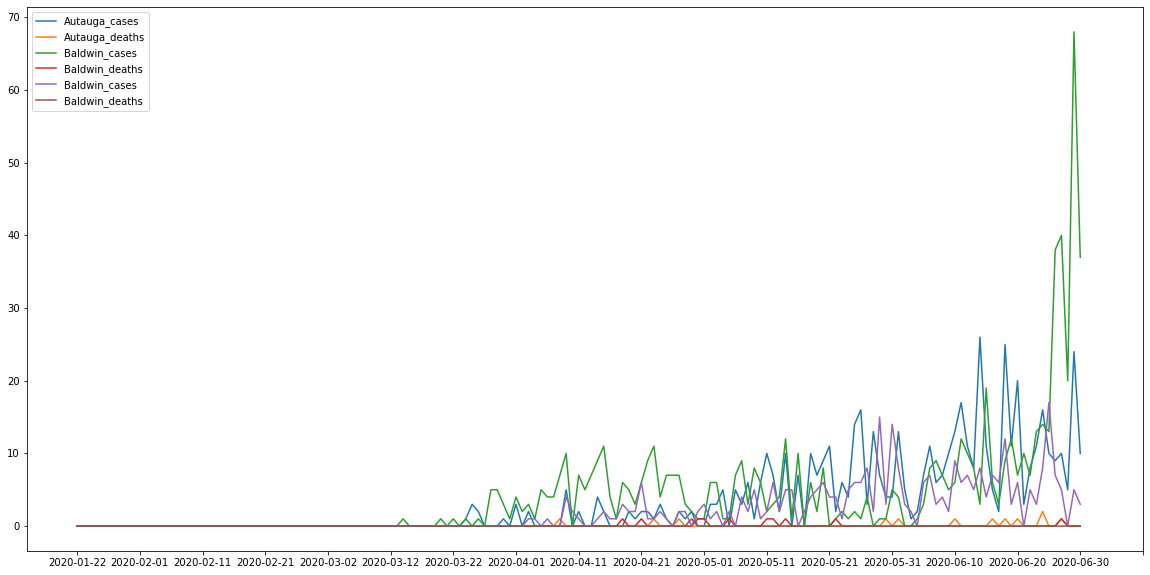

In [78]:
#plot the case and death data for first 3 rows
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(cases_final.iloc[0,7:])
plt.plot(deaths_final.iloc[0,7:])
plt.plot(cases_final.iloc[1,7:])
plt.plot(deaths_final.iloc[1,7:])
plt.plot(cases_final.iloc[2,7:])
plt.plot(deaths_final.iloc[2,7:])
# x label once every 7 days
plt.xticks(np.arange(0, 180, 10))

plt.legend(['Autauga_cases','Autauga_deaths','Baldwin_cases','Baldwin_deaths','Baldwin_cases','Baldwin_deaths'])
plt.show()
